# Q1: Obtain the Data

## Description

### We will obtain our weather data from the 2866825.csv file and complement it with the athens.csv file. After changing variable types, convert some of the measure units and clean some unknown values the final dataset is ready for use.

In [1]:
#import library pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime

%matplotlib inline

In [2]:
#import the 2 datasets as dataframes
data1 = pd.read_csv("2866825.csv")
data2 = pd.read_csv("athens.csv", header=None)

In [3]:
#check head and tails of data1
data1

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1/1/1955,0.00,NaN,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",1/2/1955,0.08,NaN,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",1/3/1955,0.00,NaN,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",1/4/1955,0.00,NaN,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",1/5/1955,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",12/27/2020,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",12/28/2020,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,"HELLINIKON, GR",12/29/2020,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,"HELLINIKON, GR",12/30/2020,0.00,NaN,62.0,68.0,59.0


In [4]:
#check head and tails of data2
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1/1/2010,17.90,18.10,17.80,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7,2010
1,1/2/2010,15.60,15.70,15.50,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7,2010
2,1/3/2010,13.50,13.60,13.40,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4,2010
3,1/4/2010,9.50,9.60,9.50,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0,2010
4,1/5/2010,13.40,13.50,13.40,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,12/27/2019,10.10,10.20,10.00,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0,2019
3648,12/28/2019,8.30,8.40,8.20,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8,2019
3649,12/29/2019,6.40,6.50,6.40,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5,2019
3650,12/30/2019,4.00,4.00,3.90,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0,2019


In [5]:
#delete not needed for the assignment columns from data1
data1 = data1.drop('SNWD', axis=1)

In [6]:
#convert Fahrenheit to Celsius in data1
data1['TAVG'] = (data1.TAVG - 32)*5/9
data1['TMAX'] = (data1.TMAX - 32)*5/9
data1['TMIN'] = (data1.TMIN - 32)*5/9

In [7]:
#convert inches to mm
data1['PRCP'] = (data1.PRCP *25.4)

In [8]:
#delete not needed for the assignment columns from data2
data2 = data2[[0,1,2,3,10]]

In [9]:
#name the columns of data2
data2 = data2.rename(columns={0:"DATE", 1:"TAVG", 2:"TMAX", 3:"TMIN", 10:"PRCP"})

In [10]:
#convert characters to NaN for float type columns in data2
data2.TAVG = data2.TAVG.replace('---', np.nan)
data2.TMAX = data2.TMAX.replace('---', np.nan)
data2.TMIN = data2.TMIN.replace('---', np.nan)

In [11]:
#change type of columns in data2
data2['TAVG'] = data2.TAVG.astype('float64')
data2['TMAX'] = data2.TMAX.astype('float64')
data2['TMIN'] = data2.TMIN.astype('float64')

In [12]:
#merge the 2 datasets with outer join on column DATE
data = data1.merge(data2, on=["DATE"], how='outer')

In [13]:
#fill NaN values of x with values of y
data.PRCP_x = data.PRCP_x.fillna(data.PRCP_y)
data.TAVG_x = data.TAVG_x.fillna(data.TAVG_y)
data.TMAX_x = data.TMAX_x.fillna(data.TMAX_y)
data.TMIN_x = data.TMIN_x.fillna(data.TMIN_y)

In [14]:
#remove y columns
data = data.drop(['TAVG_y', 'TMAX_y','TMIN_y','PRCP_y'], axis=1)

In [15]:
#rename x columns
data.rename(columns={'PRCP_x': 'PRCP', 'TAVG_x':'TAVG', 'TMAX_x':'TMAX', 'TMIN_x':'TMIN'}, inplace=True)

In [16]:
#change columns dtypes
data['DATE'] = data.DATE.astype('Datetime64')

In [17]:
#The final dataset
data

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.000,NaN,18.333333,10.000000
1,GR000016716,"HELLINIKON, GR",1955-01-02,2.032,NaN,14.444444,7.222222
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.000,NaN,15.555556,9.444444
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.000,NaN,18.888889,7.222222
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.000,NaN,17.777778,8.333333
...,...,...,...,...,...,...,...
24099,NaN,NaN,2017-10-02,0.000,18.7,18.800000,18.600000
24100,NaN,NaN,2017-10-08,0.000,17.8,17.900000,17.700000
24101,NaN,NaN,2017-10-15,0.000,20.4,20.500000,20.300000
24102,NaN,NaN,2017-10-27,0.000,17.8,17.900000,17.700000


# Q2: Deviation of Summer Temperatures

## Description

### We will create a graph showing the mean summer temperature deviation from a baseline of 1974-1999 and a line showing the 10 years rolling avarege of the deviation from the mean.

## Solution

In [18]:
#create dataset of summer months from 1955 to 2020
data_summer = data.loc[(data.DATE.dt.month.isin([6,7,8]))]
#1955-2020 summers mean temperature per year
mean_summer_temp_per_year = data_summer.groupby(data_summer.DATE.dt.year).agg('mean')

#1974-1999 summers mean temperature
mean_temp = data.loc[(data['DATE'] >= '1974-06-01' ) & 
                   (data['DATE'] <= '1999-08-31') &
                   (data.DATE.dt.month.isin([6,7,8]))].TAVG.mean()

#create dataframe of deviation of summer TAVG per year from the mean_temp
mean_summer_temp_per_year['deviation'] = mean_summer_temp_per_year.TAVG - mean_temp 

#create column of moving average of 10 years
mean_summer_temp_per_year['MA'] = mean_summer_temp_per_year['deviation'].rolling(window=10, min_periods=1).mean()

## Graph

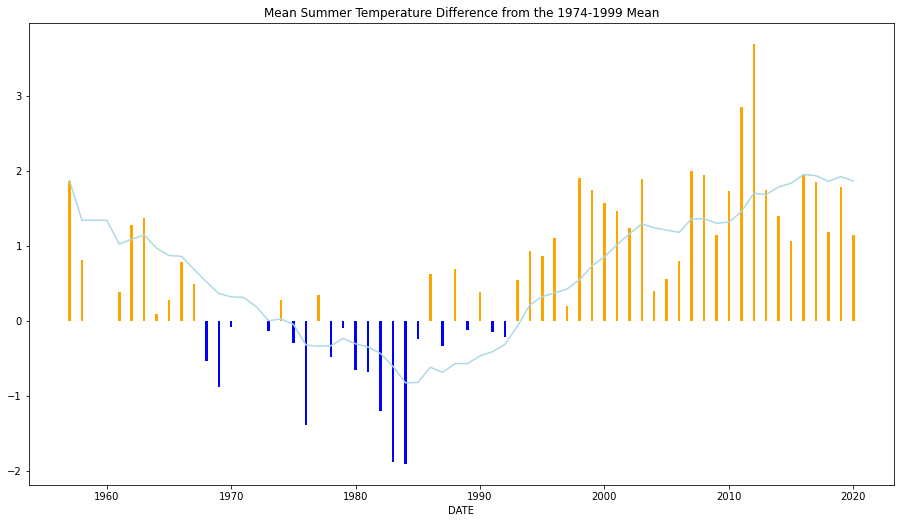

In [19]:
#create the graph of deviation per year and MA per 10 years
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
plt.bar(data.DATE.dt.year.drop_duplicates(), mean_summer_temp_per_year['deviation'], 
        color=np.where(mean_summer_temp_per_year['deviation'] < 0, 'blue', 'orange'),
        width = 0.2)
#create the plot line of 10 year moving average
mean_summer_temp_per_year['MA'].plot(kind='line', color='lightblue')
#add title and show 
plt.title('Mean Summer Temperature Difference from the 1974-1999 Mean')
plt.show()

## Interpretation

### The mean summer temperature has increased as years passing by after year 1992, in comparison to 1974-1999 summers' mean. This is an indicator of the greenhouse effect and how it has drastically affected summer temperatures the last 30 years.

# Q3: Evolution of Daily Temperatures

## Description

### We will create a plot showing the daily temperature for each year and a line showing the average daily temperature for the baseline period of 1974-1999. Both will be smoothed using a 30 days rolling average.

## 1955-2020

In [20]:
#daily average temperature for years 1955-2020
data_Q3 = data[['DATE','TAVG']] 

In [21]:
#set date as index
data_Q3 = data_Q3.set_index('DATE')

In [22]:
#Smooth with moving average window of 30
data_Q3['TAVG'] = data_Q3.TAVG.rolling(window=30,min_periods=1).mean()

In [23]:
#Create 2 columns for day and year
data_Q3['day'] = data_Q3.index.dayofyear
data_Q3['month'] = data_Q3.index.month
data_Q3['year'] = data_Q3.index.year
#create pivot table using data_Q3
piv = data_Q3.pivot(index=['year'],columns=['day'], values=['TAVG'])

## 1974-1999

In [24]:
#daily average temperature for years 1974-1999
data_1974_1999 = data.loc[(data['DATE'] >= '1974-06-01' ) & 
                   (data['DATE'] <= '1999-08-31') ]
black_line_data = data_1974_1999[['DATE','TAVG']]

In [25]:
#set date as index
black_line_data = black_line_data.set_index('DATE')

In [26]:
#Smooth with moving average window of 30
black_line_data = black_line_data.rolling(window=30,min_periods=1).mean()

In [27]:
#Create 2 index columns for day and year
black_line_data['day'] = black_line_data.index.dayofyear
black_line_data['year'] = black_line_data.index.year
#create pivot table using black_line_data
piv2 = black_line_data.pivot(index=['year'],columns=['day'], values=['TAVG'])

## Graph

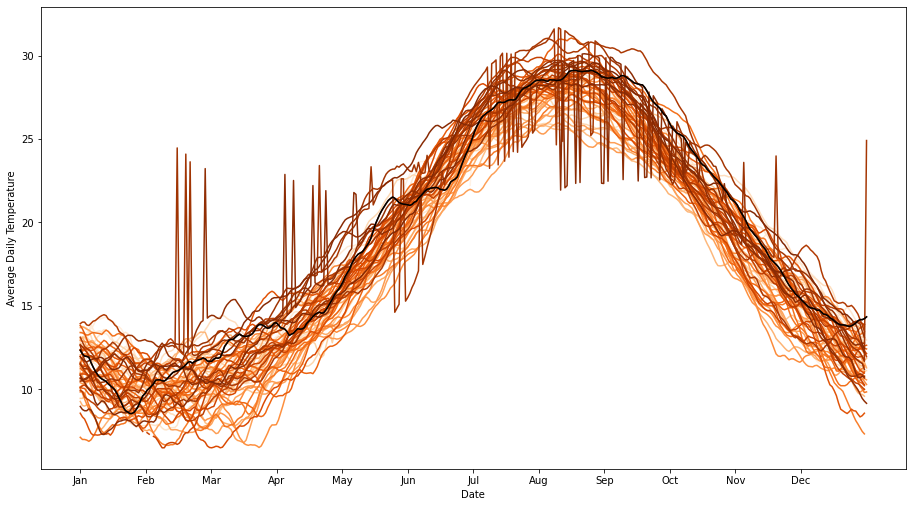

In [28]:
#plot of daily average temperature for each year
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
n = 66
colors = cm.Oranges(np.linspace(0,1,n))
i=0
for year, day in piv.iterrows():
    plt.plot(day.to_numpy(), color= colors[i])
    i+=1
plt.xticks(np.linspace(0,365,13)[:-1], ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.xlabel("Date")
plt.ylabel("Average Daily Temperature")
plt.plot(day.to_numpy(), color= 'black')

## Interpretation

### Temperatures are starting low in winter months and getting higher as we reach spring and summer months until a final decline in autumn months. It is observed that daily temperatures are not highly different through out the years for winter and autumn months in comparison to spring and summer months where temperatures are highler getting closer to year 2020. This means that high temperatures are highly more affected through out the years than low temperatures.

# Q4: Extreme Temperature Events

## Description

### We will create a plot to count the number of extreme temperature events per year, compared to the baseline of 1974-1999 and a line in the middle as the average percentage of extreme temperature events of the baseline.

## Baseline

In [29]:
baseline_data = data_1974_1999[['DATE','TAVG']]

In [30]:
#set date as index
baseline_data = baseline_data.set_index('DATE')

In [31]:
#Create 2 index columns for day and year
baseline_data['day'] = baseline_data.index.dayofyear
baseline_data['year'] = baseline_data.index.year

In [32]:
#data of period 1974-1999 per day of year
piv3 = baseline_data.pivot(index=['day'],columns=['year'], values=['TAVG'])

In [33]:
#expected value of avg temperature per day of year
exp_val = piv3.mean(axis=1)

In [34]:
#data of period 1974-1999 per year
piv4 = baseline_data.pivot(index=['year'],columns=['day'], values=['TAVG'])

In [35]:
#convert pivot to dataframe
piv4.columns = piv4.columns.droplevel(0)
piv4.columns.name = None               
piv4 = piv4.reset_index()

In [36]:
#calculate number of observasions per year
piv4['number_of_observ'] = piv4.count(axis=1)-1

In [37]:
#calculate variation of each day's temp from expected value
i = 1
for j in range(1,367):
    piv4[j] = ((piv4[j] - exp_val[i])/exp_val[i])
    i+=1

In [38]:
#transpose the table
piv4_tran = piv4.T

#keep extreme values as True
piv4_1 = piv4_tran > 0.1

In [39]:
#Count True values as number of extreme events per year
count_of_extreme_events_baseline = (piv4_1.sum()-2)/(piv4['number_of_observ'])

In [40]:
#calculate the baseline mean percentage of extreme events
round(count_of_extreme_events_baseline.mean(),2)

0.25

## 1955-2020

In [41]:
#daily average temperatures for years 1955-2020
data_Q4 = data[['DATE','TAVG']] 

In [42]:
#set date as index
data_Q4 = data_Q4.set_index('DATE')

In [43]:
#Create 2 columns for day and year
data_Q4['day'] = data_Q4.index.dayofyear
data_Q4['year'] = data_Q4.index.year

In [44]:
#data of period 1955-2020 per year
piv6 = data_Q4.pivot(index=['year'],columns=['day'], values=['TAVG'])

In [45]:
#convert pivot to dataframe
piv6.columns = piv6.columns.droplevel(0)
piv6.columns.name = None               
piv6 = piv6.reset_index() 

In [46]:
piv6['number_of_observ'] = piv6.count(axis=1)-1

In [47]:
#calculate variation of each day's temp from expected value
i = 1
for j in range(1,367):
    piv6[j] = ((piv6[j] - exp_val[i])/exp_val[i])
    i+=1

In [48]:
#transpose the table
piv6_tran = piv6.T

#keep extreme values as True
piv6_1 = piv6_tran > 0.1

In [49]:
#Count True values as number of extreme events per year
count_of_extreme_events = (piv6_1.sum()-2 )/(piv6['number_of_observ'])

## Graph

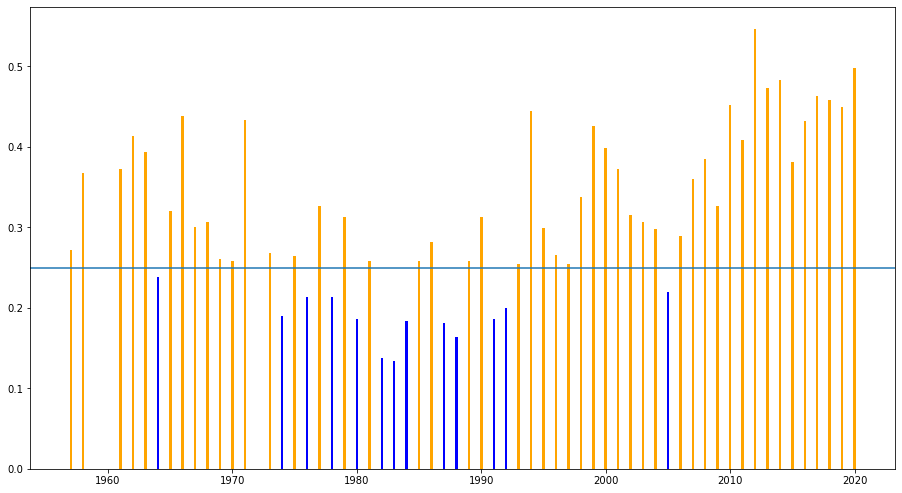

In [50]:
#create the graph and line
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
plt.bar(data_Q4.year.unique(), count_of_extreme_events , 
        color=np.where(count_of_extreme_events  < count_of_extreme_events_baseline.mean() , 'blue', 'orange'),
        width = 0.2)
#create the plot line of 10 year moving average
plt.axhline(count_of_extreme_events_baseline.mean())

## Interpretation

### It is observed that the number of extreme yearly events is increased in comparison to the mean of 1974-1999 getting close to 50% of the days of a year. This mainly occurs due to the increase of high temperatures to a level higher than 10% from the baseline.

# Q5: Precipitation

## Description

### We will create create a plot showing the ratio of rainfall over rainy days over the years and a line for the 10 years rolling average.

In [51]:
#daily rainfall for years 1955-2020
data_Q5 = data[['DATE','PRCP']] 

In [52]:
#total rainfall per year
overall_rainfall = data_Q5.groupby(data_Q5.DATE.dt.year)['PRCP'].agg('sum')

In [53]:
data_Q5 = data_Q5.dropna()
data_Q5['rainy_day'] = (data_Q5.PRCP != 0)

In [54]:
#total of rainy days per year
count_rainy_days = data_Q5.groupby(data_Q5.DATE.dt.year)['rainy_day'].agg('sum')

In [55]:
#ratio of rainfall over rainy days per year
ratio = overall_rainfall/count_rainy_days

In [56]:
#ratio of rainfall over rainy days per year with rolling window 10
ratio_MA = ratio.rolling(window=10,min_periods=1).mean()

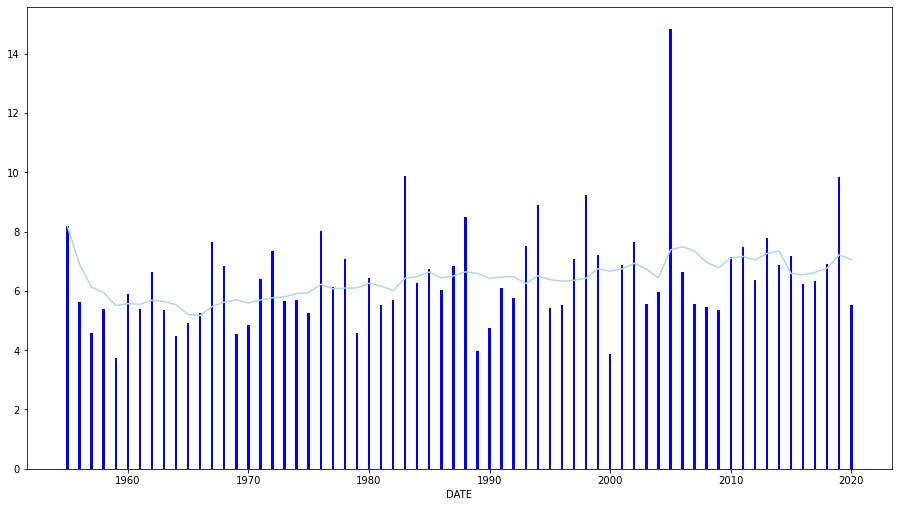

In [57]:
#create the graph and line
fig = plt.gcf()
fig.set_size_inches(15.5, 8.5)
plt.bar(data_Q5.DATE.dt.year.unique(), ratio , 
        color='blue',
        width = 0.2)
#create the plot line of 10 year moving average
ratio_MA.plot(kind='line', color='lightblue')
plt.show()

## Interpretation

### High ratios indicate a year with a few days of highly concentrated rain and lower ratios a year of many rainy days with low bursts of rain. Ratios seem to be moving in a pattern with low concentration of rainfall for 3 to 5 years and a sudden burst of high conentration of rainfall for a year.